In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Financial_inclusion_dataset.csv')
data.head(1)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed


In [2]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [3]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [4]:
cat = data.select_dtypes(exclude ='number')
num = data.select_dtypes(include = 'number')
print(f'Categorical Variables')
display(cat.head())
print(f'\n\nNumerical Variables')
display(num.head())

Categorical Variables


,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed




Numerical Variables


,year,household_size,age_of_respondent
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26


In [5]:
data.drop('uniqueid', axis = 1, inplace= True)
data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_data= data.copy()
for i in  cat.columns:
    if i in new_data:
        new_data[i]= encoder.fit_transform(new_data[i])

new_data

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,0,0,1,4,48,0,1,0,0,7
23520,3,2018,0,0,1,2,27,0,1,3,3,7
23521,3,2018,0,0,1,5,27,0,4,4,2,7
23522,3,2018,0,1,1,7,30,0,4,0,3,9


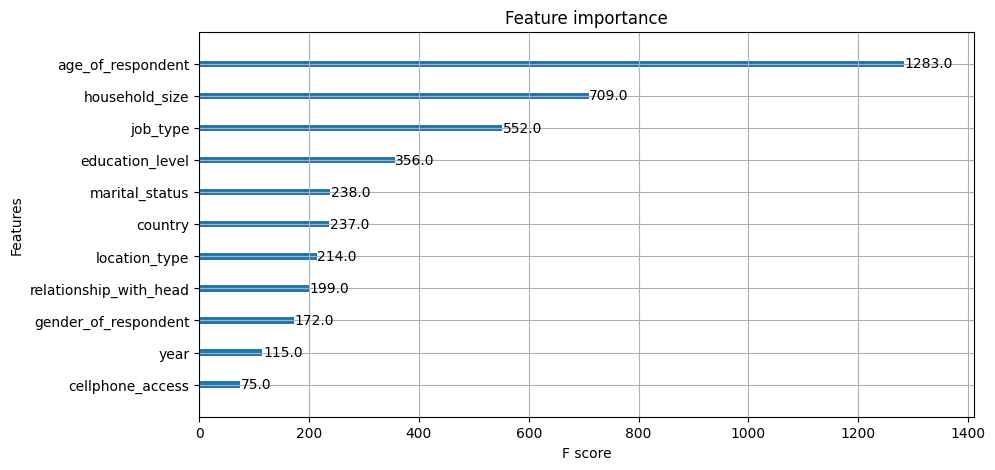

In [7]:
import xgboost as xgb
model = xgb.XGBClassifier()
x= new_data.drop('bank_account', axis = 1)
y = new_data.bank_account
model.fit(x,y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [8]:
sel_columns=['age_of_respondent','household_size', 'job_type', 'education_level', 'marital_status','country','location_type','bank_account']
sel_data = new_data[sel_columns]
sel_data

,age_of_respondent,household_size,job_type,education_level,marital_status,country,location_type,bank_account
0,24,3,9,3,2,0,0,1
1,70,5,4,0,4,0,0,0
2,26,5,9,5,3,0,1,1
3,34,5,3,2,2,0,0,0
4,26,8,5,2,3,0,1,0
...,...,...,...,...,...,...,...,...
23519,48,4,7,0,0,3,0,0
23520,27,2,7,3,3,3,0,0
23521,27,5,7,2,4,3,0,0
23522,30,7,9,3,0,3,1,0


In [9]:
x = sel_data.drop('bank_account', axis = 1)
y = sel_data.bank_account

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = y)

C:\Users\ZIYAH\AppData\Local\Temp\ipykernel_7352\1606297909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = ytrain, palette = 'Set2')


<Axes: xlabel='bank_account', ylabel='count'>

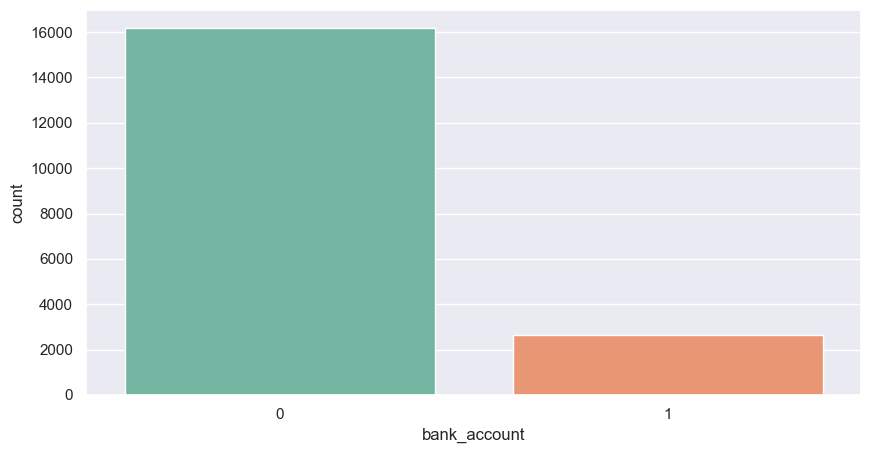

In [10]:
sns.set(style= 'darkgrid')
sns.countplot(x = ytrain, palette = 'Set2')

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


logreg = LogisticRegression()

logreg.fit(xtrain, ytrain)

cross_val = logreg.predict(xtrain)
print(classification_report(cross_val, ytrain))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     18061
           1       0.18      0.64      0.28       758

    accuracy                           0.87     18819
   macro avg       0.58      0.76      0.61     18819
weighted avg       0.95      0.87      0.90     18819



In [14]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 'auto', random_state=56)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

In [15]:
# To get the best random state to use
score = []
for i in range(100):
    smote = SMOTE(sampling_strategy= 'auto', random_state = i)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

    test_model = LogisticRegression()
    test_model.fit(X_resampled, y_resampled)

    cross_val = test_model.predict(X_resampled)
    score.append(accuracy_score(cross_val, y_resampled))

print(f'Highest Random State is: {np.array(score).argmax()}')

Highest Random State is: 9


In [16]:
smote = SMOTE(sampling_strategy= 'auto', random_state=9)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='bank_account', ylabel='count'>

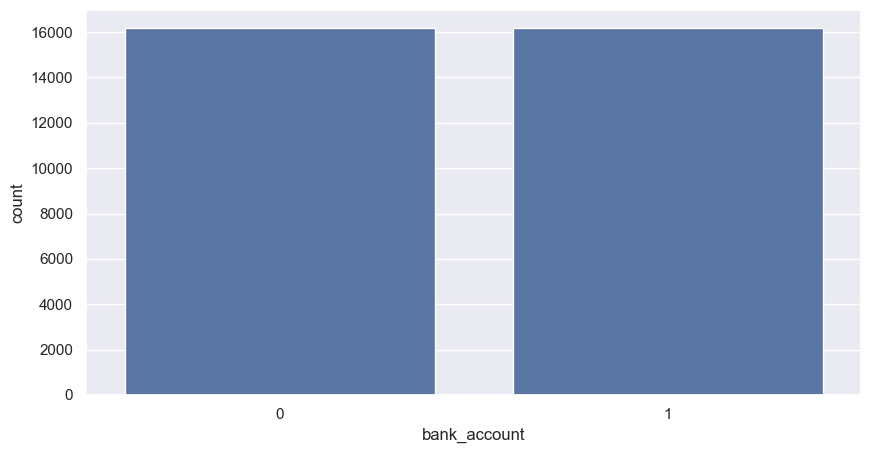

In [17]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['bank_account'])

In [18]:
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)

cross_val = logreg.predict(X_resampled)
print(classification_report(cross_val, y_resampled))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     16306
           1       0.72      0.73      0.72     16032

    accuracy                           0.73     32338
   macro avg       0.73      0.73      0.73     32338
weighted avg       0.73      0.73      0.73     32338



In [19]:
import joblib
joblib.dump(logreg, ('Finacial_Inclusion.pkl', 'wb'))